In [37]:
import numpy as np
import ot

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import seaborn
seaborn.set_theme()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
config = {
    "function_distrib":{
        "n": 1000,
        "d": 2,
        "l": 5,
        "output_size": 2,
        "function_type": "random",
        "output_function": "linear",
        "prior": "gaussian", # uniform_cube, uniform_ball, gaussian, gaussian_mixture
        "seed": 1,
    },

    "model": {
        # "input_size": # infer
        # "output_size": # infer
        "hidden_size": 100,
        "n_hidden_layers": 4
    },

    "optimizer": {
        "lr": 0.001,
    },

    "epochs": 300,
}

# Same type of function composed

In [19]:
from src.trainer import Trainer

In [20]:
function_types = ["linear", "trigonometric", "sigmoid"]

In [21]:
for function_type in function_types:
    config["function_distrib"]["function_type"] = function_type
    trainer = Trainer(config)
    losses, w2_distances = trainer.train()


Output function can only be used with random function type
Output function can only be used with random function type
Output function can only be used with random function type


# Different types of functions

In [198]:
function_types = [
    # "linear-sigmoid",
    # "linear-rbf-sigmoid", 
    "linear-rbf-trigonometric",
    # "linear-quadratic-sigmoid",
    # "random"
]

ds = [5]
output_sizes = [3]
ls = [3, 5, 7]
Ls = [3, 5, 7]
hidden_sizes = [10, 50, 100, 500]

In [241]:
import pandas as pd

df_results = pd.DataFrame(columns=["$Functions-l-d-output_{size}$", "$L$", "$hidden_{size}$", "loss", "W_2"])
results = []

for function_type in function_types:
    for l in ls:
        for d in ds:
            for output_size in output_sizes:
                run_name = f"{function_type}-{l}-{d}-{output_size}"
                print(run_name)
                for L in Ls:
                    for hidden_size in hidden_sizes:
                        config = {
                            "function_distrib":{
                                "n": 10000,
                                "d": d,
                                "l": l,
                                "output_size": output_size,
                                "function_type": function_type,
                                "output_function": "linear",
                                "prior": "gaussian", # uniform_cube, uniform_ball, gaussian, gaussian_mixture
                                "seed": 1,
                            },

                            "model": {
                                # "input_size": # infer
                                # "output_size": # infer
                                "hidden_size": hidden_size,
                                "n_hidden_layers": L
                            },

                            "optimizer": {
                                "lr": 0.001,
                                "batch_size": 64
                            },

                            "epochs": 1000,
                        }
                        config["function_distrib"]["function_type"] = function_type
                        trainer = Trainer(config)
                        losses, w2_distances = trainer.train()
                        results.append({
                            "$Functions-l-d-output_{size}$": run_name,
                            "$L$": L,
                            "$hidden_{size}$": hidden_size,
                            "loss": losses[-1],
                            "W_2": w2_distances[-1]
                        })
                        print(results[-1])
                    

linear-rbf-trigonometric-3-5-3
{'$Functions-l-d-output_{size}$': 'linear-rbf-trigonometric-3-5-3', '$L$': 3, '$hidden_{size}$': 10, 'loss': 241.3189697265625, 'W_2': 155.81356035864198}
{'$Functions-l-d-output_{size}$': 'linear-rbf-trigonometric-3-5-3', '$L$': 3, '$hidden_{size}$': 50, 'loss': 39.199134826660156, 'W_2': 25.25270788043645}
{'$Functions-l-d-output_{size}$': 'linear-rbf-trigonometric-3-5-3', '$L$': 3, '$hidden_{size}$': 100, 'loss': 15.812195777893066, 'W_2': 12.97329788317741}
{'$Functions-l-d-output_{size}$': 'linear-rbf-trigonometric-3-5-3', '$L$': 3, '$hidden_{size}$': 500, 'loss': 11.436005592346191, 'W_2': 11.547055730119002}
{'$Functions-l-d-output_{size}$': 'linear-rbf-trigonometric-3-5-3', '$L$': 5, '$hidden_{size}$': 10, 'loss': 46.09310531616211, 'W_2': 30.164209941122166}
{'$Functions-l-d-output_{size}$': 'linear-rbf-trigonometric-3-5-3', '$L$': 5, '$hidden_{size}$': 50, 'loss': 16.76580047607422, 'W_2': 12.691580247863921}
{'$Functions-l-d-output_{size}$': 'l

In [242]:
import datetime

df_results = pd.DataFrame(results)
df_results.to_csv(f"./results/{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_seed_1.csv")

# Multiindex
df_results = df_results.groupby(["$Functions-l-d-output_{size}$", "$L$", "$hidden_{size}$"]).mean()
print(df_results)

# export to latex
latex_results = df_results.to_latex(
    escape=False,
    position="H",
    multicolumn_format="c",
    caption="Wasserstein-2 distance and validation loss for different compositions of functions and depths with a Gaussian prior",
    label="tab:results-random-gaussian",
    float_format="%.2f"
)

import pyperclip
pyperclip.copy(latex_results)

print(latex_results)

                                                            loss           W_2
$Functions-l-d-output_{size}$  $L$ $hidden_{size}$                            
linear-rbf-trigonometric-3-5-3 3   10                 241.318970    155.813560
                                   50                  39.199135     25.252708
                                   100                 15.812196     12.973298
                                   500                 11.436006     11.547056
                               5   10                  46.093105     30.164210
                                   50                  16.765800     12.691580
                                   100                 14.980403     13.138341
                                   500                 14.582871     13.702142
                               7   10                  31.730324     21.981197
                                   50                  15.410504     13.212799
                                   100              

# Plot distributions and approximations

function_type: sigmoid
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: 2
Comp. layer 0 - temp.shape: (1000, 2)


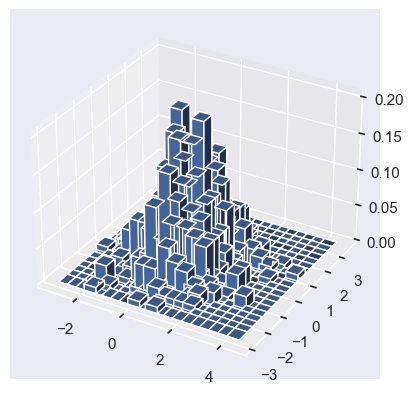

Comp. layer 1 - temp.shape: (1000, 2)


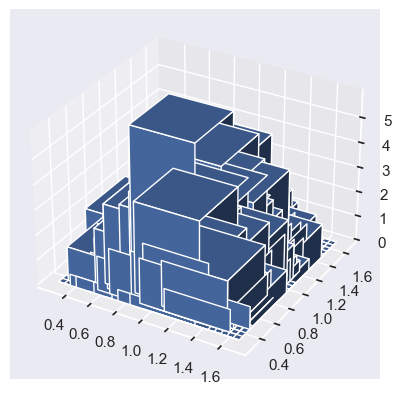

Comp. layer 2 - temp.shape: (1000, 2)


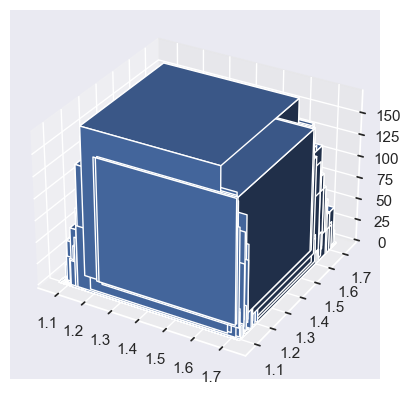

Comp. layer 3 - temp.shape: (1000, 2)


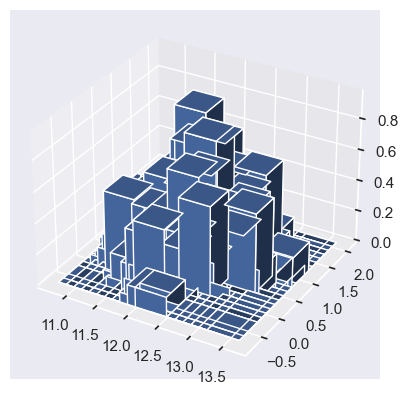

Comp. layer 4 - temp.shape: (1000, 2)


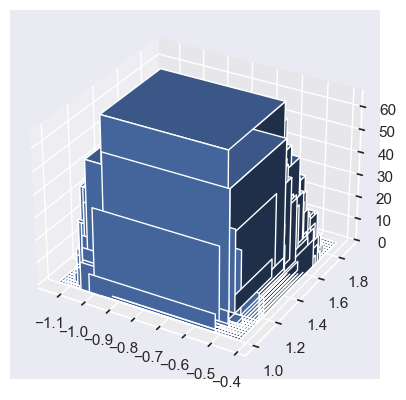

Comp. layer 5 - temp.shape: (1000, 2)


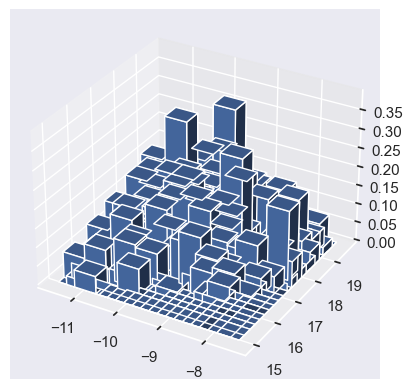

Comp. layer 5 - temp.shape: (1000, 2)


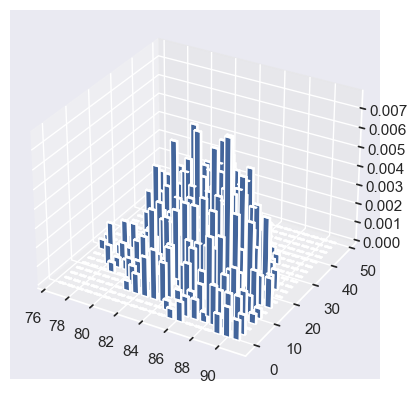

(array([[-0.41675785, -0.05626683],
        [-2.1361961 ,  1.64027081],
        [-1.79343559, -0.84174737],
        ...,
        [ 0.86196115,  0.22402915],
        [ 0.0106053 ,  0.86851322],
        [-0.12185276,  0.75622156]]),
 array([[86.22858397, 21.8936357 ],
        [90.67043399,  1.63026126],
        [88.85453684, 25.54805472],
        ...,
        [81.57346763, 23.59578464],
        [84.98120204, 12.95110905],
        [85.47756878, 13.65328603]]))

In [206]:
config = {
    "function_distrib":{
        "n": 1000,
        "d": 2,
        "l": 6,
        "output_size": 2,
        "function_type": "linear-sigmoid-trigonometric",
        "output_function": "linear",
        "prior": "gaussian", # uniform_cube, uniform_ball, gaussian, gaussian_mixture
        "seed": 1,
    },

    "model": {
        # "input_size": # infer
        # "output_size": # infer
        "hidden_size": 100,
        "n_hidden_layers": 4
    },

    "optimizer": {
        "lr": 0.001,
    },

    "epochs": 300,
}

trainer = Trainer(config, is_debug=True)
trainer.function_distrib.generate_data(visualize=True)

function_type: sigmoid
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: 2
function_type: sigmoid
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: 2
function_type: sigmoid
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_

array([<Axes3D: title={'center': 'Input distribution'}>,
       <Axes3D: title={'center': 'Original Output distribution'}>,
       <Axes3D: title={'center': 'NN Output distribution'}>], dtype=object)

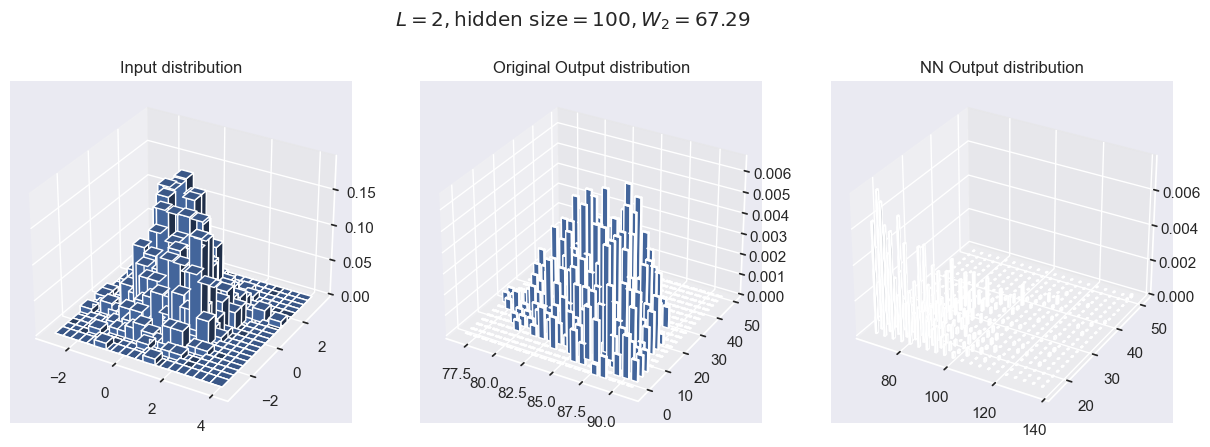

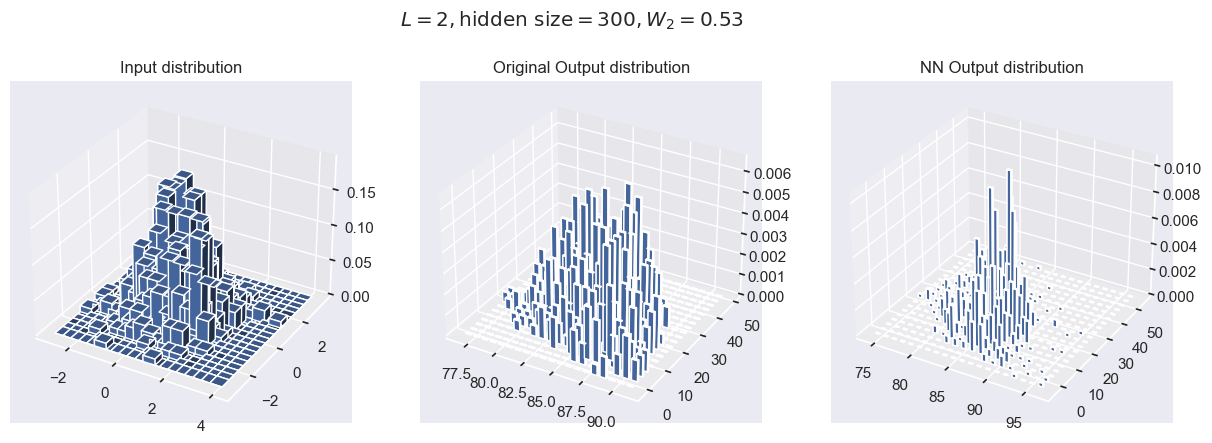

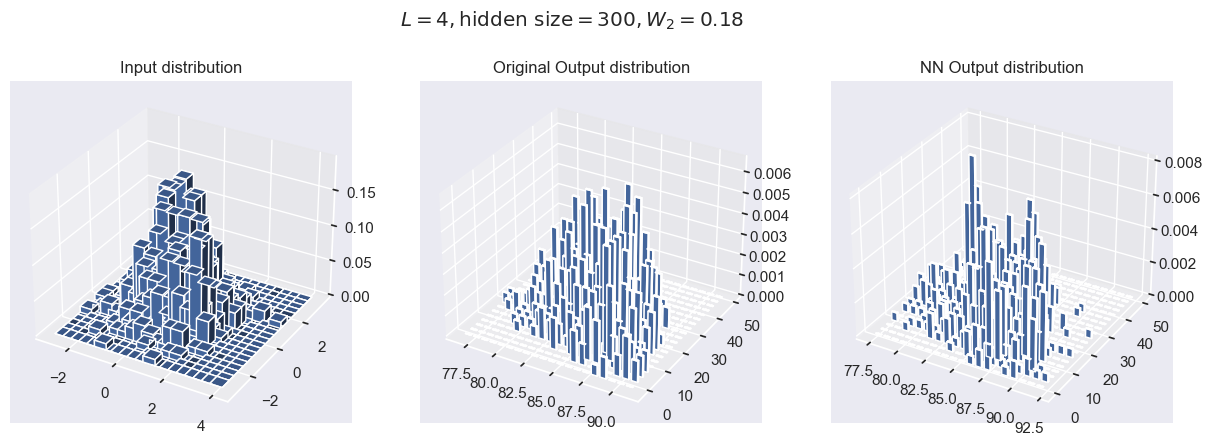

In [207]:
n_hidden_size = 100
n_layers = 2

config["model"]["hidden_size"] = n_hidden_size
config["model"]["n_hidden_layers"] = n_layers

trainer = Trainer(config, is_debug=False)
# trainer.function_distrib.generate_data(visualize=True)
losses, w2_distances = trainer.train()
trainer.plot_input_output(title=rf"$L={n_layers}, \text{{hidden size}}={n_hidden_size}, W_2={w2_distances[-1]:.2f}$")

n_hidden_size = 300
n_layers = 2
config["model"]["hidden_size"] = n_hidden_size
config["model"]["n_hidden_layers"] = n_layers

trainer = Trainer(config, is_debug=False)
losses, w2_distances = trainer.train()
trainer.plot_input_output(title=rf"$L={n_layers}, \text{{hidden size}}={n_hidden_size}, W_2={w2_distances[-1]:.2f}$")

n_hidden_size = 300
n_layers = 4
config["model"]["hidden_size"] = n_hidden_size
config["model"]["n_hidden_layers"] = n_layers

trainer = Trainer(config, is_debug=False)
losses, w2_distances = trainer.train()
trainer.plot_input_output(title=rf"$L={n_layers}, \text{{hidden size}}={n_hidden_size}, W_2={w2_distances[-1]:.2f}$")

function_type: sigmoid
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: 1
Comp. layer 0 - temp.shape: (10000, 2)


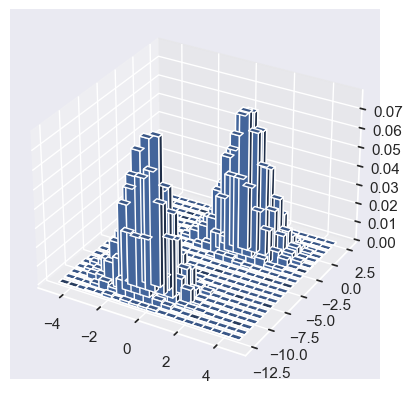

Comp. layer 1 - temp.shape: (10000, 2)


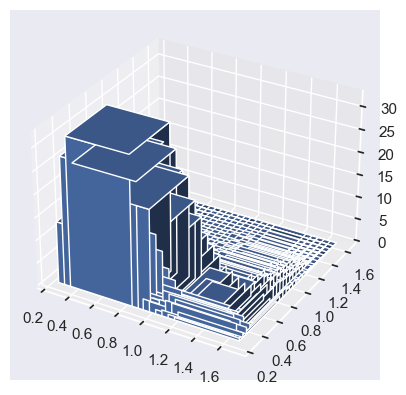

Comp. layer 2 - temp.shape: (10000, 2)


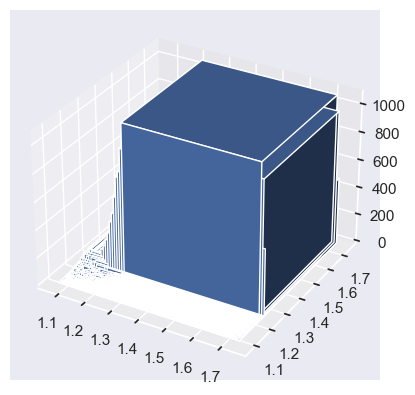

Comp. layer 3 - temp.shape: (10000, 2)


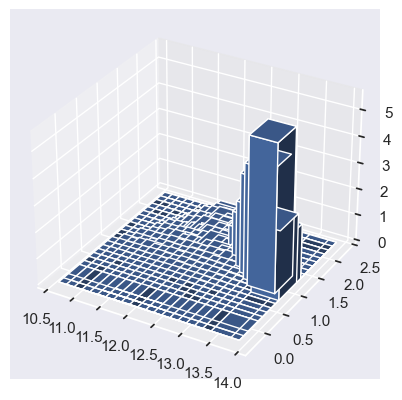

Comp. layer 4 - temp.shape: (10000, 2)


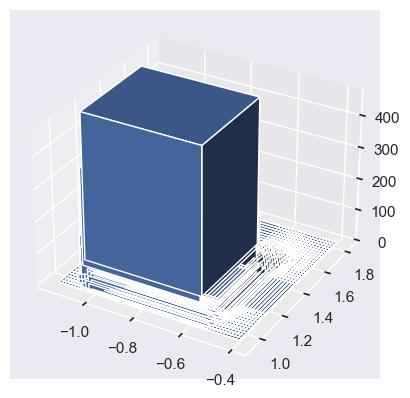

Comp. layer 5 - temp.shape: (10000, 2)


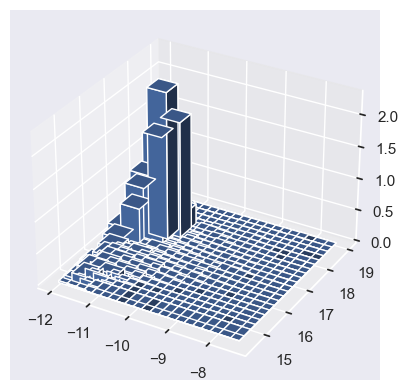

Comp. layer 6 - temp.shape: (10000, 2)


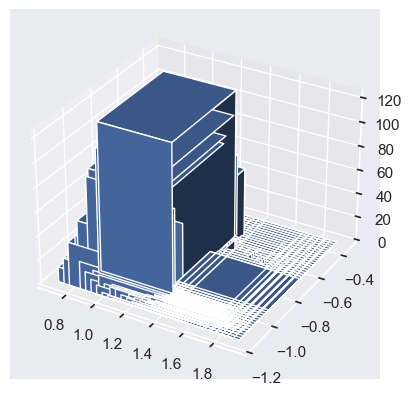

Comp. layer 7 - temp.shape: (10000, 2)


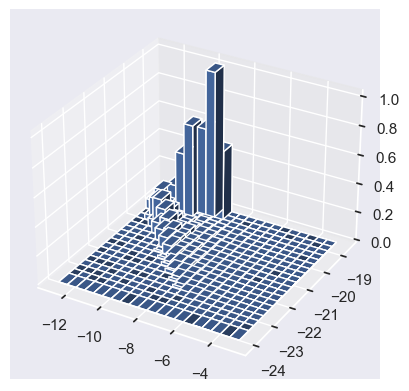

Comp. layer 7 - temp.shape: (10000, 1)


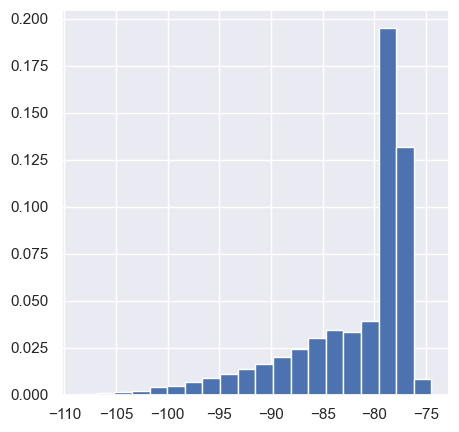

(array([[-0.20530675, -9.12387821],
        [-2.10527363, -9.53274339],
        [ 1.00215972, -1.13475333],
        ...,
        [ 1.41532541, -8.58363568],
        [ 1.31618339, -1.48778234],
        [ 0.56549238, -1.05513266]]),
 array([[-77.09652744],
        [-78.43097805],
        [-85.58450722],
        ...,
        [-75.39096785],
        [-83.23846948],
        [-85.9750236 ]]))

In [239]:
config = {
    "function_distrib":{
        "n": 10000,
        "d": 2,
        "l": 8,
        "output_size": 1,
        "function_type": "linear-sigmoid-trigonometric",
        "output_function": "linear",
        "prior": "gaussian_mixture", # uniform_cube, uniform_ball, gaussian, gaussian_mixture
        "seed": 1,
    },

    "model": {
        # "input_size": # infer
        # "output_size": # infer
        "hidden_size": 100,
        "n_hidden_layers": 4
    },

    "optimizer": {
        "lr": 0.01,
        "batch_size": 64,
    },

    "epochs": 1000,
}

trainer = Trainer(config, is_debug=True)
trainer.function_distrib.generate_data(visualize=True)

function_type: sigmoid
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: 1
function_type: sigmoid
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: None
function_type: linear
input_size: 2
output_size: 1
function_type: sigmoid
input_size: 2
output_size: None
function_type: trigonometric
input_size: 2


array([<Axes3D: title={'center': 'Input distribution'}>,
       <Axes: title={'center': 'Original Output distribution'}>,
       <Axes: title={'center': 'NN Output distribution'}>], dtype=object)

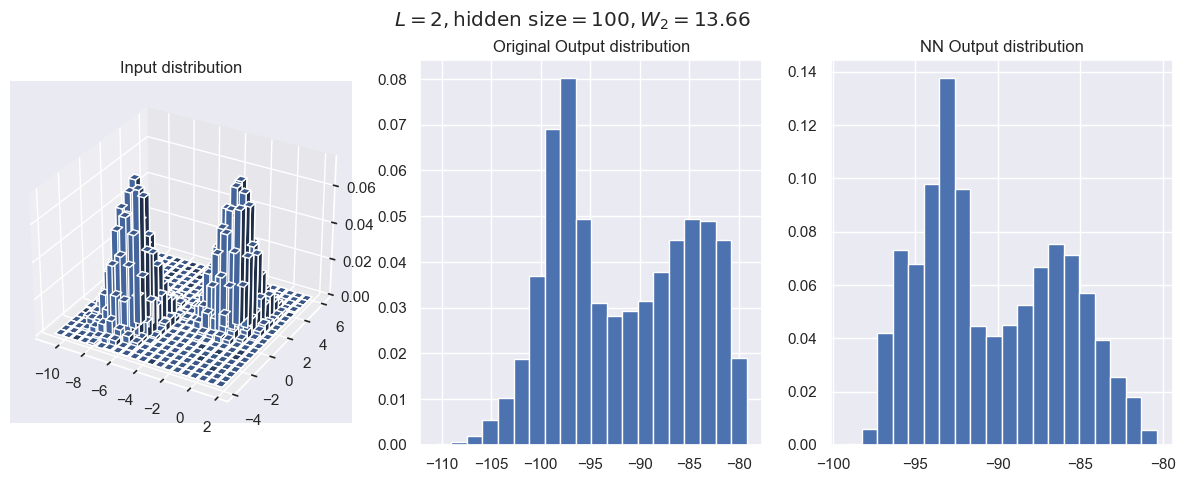

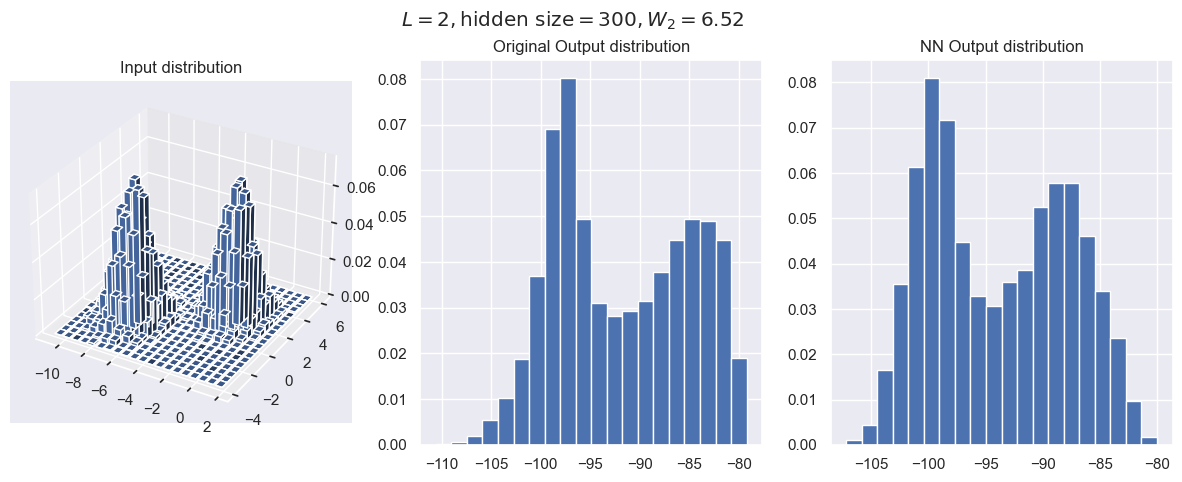

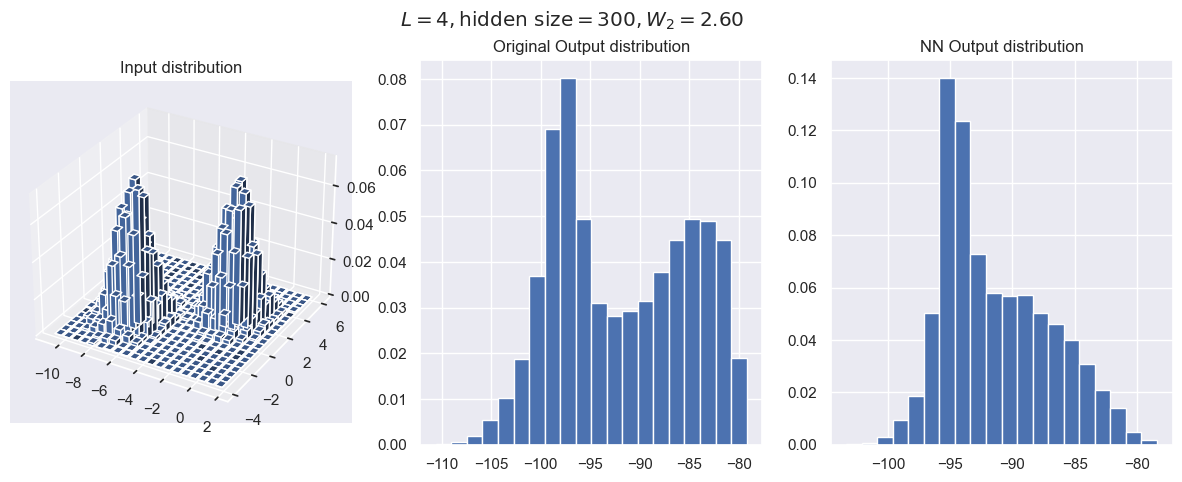

In [240]:
n_hidden_size = 100
n_layers = 2

config["model"]["hidden_size"] = n_hidden_size
config["model"]["n_hidden_layers"] = n_layers

trainer = Trainer(config, is_debug=False)
# trainer.function_distrib.generate_data(visualize=True)
losses, w2_distances = trainer.train()
trainer.plot_input_output(title=rf"$L={n_layers}, \text{{hidden size}}={n_hidden_size}, W_2={w2_distances[-1]:.2f}$")

n_hidden_size = 300
n_layers = 2
config["model"]["hidden_size"] = n_hidden_size
config["model"]["n_hidden_layers"] = n_layers

trainer = Trainer(config, is_debug=False)
losses, w2_distances = trainer.train()
trainer.plot_input_output(title=rf"$L={n_layers}, \text{{hidden size}}={n_hidden_size}, W_2={w2_distances[-1]:.2f}$")

n_hidden_size = 300
n_layers = 4
config["model"]["hidden_size"] = n_hidden_size
config["model"]["n_hidden_layers"] = n_layers

trainer = Trainer(config, is_debug=False)
losses, w2_distances = trainer.train()
trainer.plot_input_output(title=rf"$L={n_layers}, \text{{hidden size}}={n_hidden_size}, W_2={w2_distances[-1]:.2f}$")